In [1]:
import os
import json
import pandas as pd
import logging
import re
import string
import seaborn as sns

In [2]:
def initialize_csv(output):
    try:
        with open(output, "w", encoding="UTF-8") as fh:
            fh.write("tweets; created_at; country\n")
    except:
        raise
    else:
        logging.info('Não foi possível criar o csv...')

In [3]:
def clean_tweet(tweet):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    tweet = re.sub(emoj, '', tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = re.sub(r'http\S+', '', tweet)
    
    tweet = tweet.lower().strip().replace('\r', '').replace('\n', ' ')
    return tweet

In [4]:
def write_csv(csv_output, tweet, country):
    try:
        with open(csv_output, "a", encoding="UTF-8") as output_file:
            tweet_text = clean_tweet(tweet["text"])
            output_file.write(f'"{tweet_text}"; {tweet["created_at"]}; {country}\n')
    except:
        raise

In [5]:
def read_json(tweet_path):
    with open(tweet_path, "r", encoding='utf-8') as fh:
        return json.load(fh)

In [6]:
base_df = {
    "tweet": [],
    "created_at": [],
    "country": []
}
base_path = "../dados/twitter/"
countries = ["AR", "CL", "EC", "ES", "MX"]

for country in countries:
    # csv_output = f"tweets_{country}.csv"
    # initialize_csv(csv_output)
    for root, dirs, files in os.walk(f"{base_path}{country}/", topdown=False):
        for name in files:
            tweet_path = os.path.join(root, name).replace("\\", "/")
            tweets = read_json(tweet_path)
            if tweets["meta"]["result_count"] > 0:
                tweets_data = tweets["data"]
                for tweet in tweets_data:
                    tweet["text"] = clean_tweet(tweet["text"])
                    base_df["tweet"].append(tweet["text"])
                    base_df["created_at"].append(tweet["created_at"])
                    base_df["country"].append(country)
            else:
                logging.error(f"json in path '{tweet_path}' does not contain any data.")
                
df = pd.DataFrame(base_df)
df.drop_duplicates(subset="tweet", inplace=True)
df.reset_index(drop=True, inplace=True)
# df.to_csv('twitter_data.csv', index=False)
df.head()

ERROR:root:json in path '../dados/twitter/AR/extract_date=2020-02-14/CovidTweets_AR_20200214.json' does not contain any data.
ERROR:root:json in path '../dados/twitter/CL/extract_date=2020-02-14/CovidTweets_CL_20200214.json' does not contain any data.
ERROR:root:json in path '../dados/twitter/CL/extract_date=2020-02-17/CovidTweets_CL_20200217.json' does not contain any data.
ERROR:root:json in path '../dados/twitter/EC/extract_date=2020-02-14/CovidTweets_EC_20200214.json' does not contain any data.
ERROR:root:json in path '../dados/twitter/EC/extract_date=2020-02-18/CovidTweets_EC_20200218.json' does not contain any data.
ERROR:root:json in path '../dados/twitter/EC/extract_date=2020-02-21/CovidTweets_EC_20200221.json' does not contain any data.


,tweet,created_at,country
0,la oms estima que no habrá vacuna contra el co...,2020-02-11T22:42:56.000Z,AR
1,coronavirus covid19 la enfermedad del nuevo vi...,2020-02-11T22:02:19.000Z,AR
2,no digas virus chino o enfermedad china porque...,2020-02-11T18:25:08.000Z,AR
3,coronavirus covid19 paciente contagiada fue li...,2020-02-12T17:05:53.000Z,AR
4,covid19 es el nombre que la oms le ha dado al ...,2020-02-12T12:22:20.000Z,AR


In [7]:
df.sample(20)['tweet']

49167     3 am y yo escuchando la melodía de dios a todo...
43095     pasapalabra tripa  está chequeado que tripager...
16030     pero según los tuiteros libertarios de siempre...
113194    las autoridades sanitarias ya han autorizado e...
18182     mi ex vio este twitt y me dijo practicamente q...
13601     covid19 la oms aclara que las estaciones no af...
49574     no saben si vacunarla contra el covid o contra...
144524    2 of my colleagues were in italy north this we...
13687          6000 casos de covid pero no hay caso con vos
51143     no existe un tratamiento contra la parosmia no...
205470               negativo en covid  negativo en cockbig
152782    el covid19 accelera la conformació d’un nou or...
70521     estimada comunidad entregamos informe covid19 ...
212047    mientras tanto en el méxico  real en el que el...
23055     vas a renegar para tenerme como tú víctima cov...
122181    marialaguagua4 fernandopullah1 pedropalaciosu ...
15072     yo  cuarentenacreativa cuarent

In [8]:
from afinn import Afinn

afn = Afinn()
afinn_score = [afn.score(tweet) for tweet in df.tweet]
sentiment = ['positive' if score > 0
                        else 'negative' if score < 0
                        else 'neutral'
                        for score in afinn_score]

In [9]:
df["afinn_score"] = afinn_score
df["sentiment"] = sentiment

In [10]:
df.head()

,tweet,created_at,country,afinn_score,sentiment
0,la oms estima que no habrá vacuna contra el co...,2020-02-11T22:42:56.000Z,AR,-1.0,negative
1,coronavirus covid19 la enfermedad del nuevo vi...,2020-02-11T22:02:19.000Z,AR,0.0,neutral
2,no digas virus chino o enfermedad china porque...,2020-02-11T18:25:08.000Z,AR,-1.0,negative
3,coronavirus covid19 paciente contagiada fue li...,2020-02-12T17:05:53.000Z,AR,-2.0,negative
4,covid19 es el nombre que la oms le ha dado al ...,2020-02-12T12:22:20.000Z,AR,2.0,positive


In [11]:
df.to_csv('twitter_sentiment.csv')

<AxesSubplot: xlabel='tweet', ylabel='sentiment'>

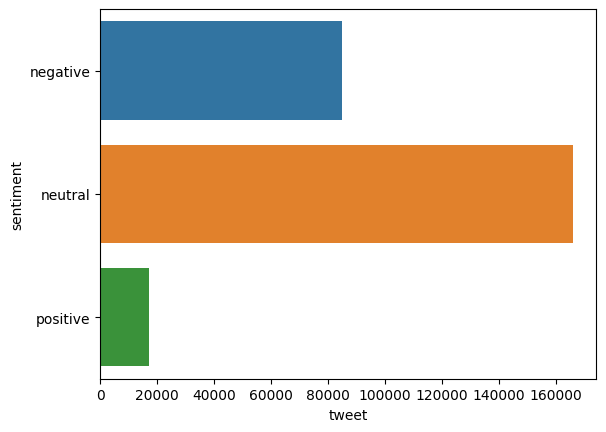

In [18]:
buffer = df.groupby(['sentiment'], group_keys=False).count()[['tweet']].reset_index()
sns.barplot(data=buffer, x='tweet', y='sentiment')

In [19]:
buffer

,sentiment,tweet
0,negative,85065
1,neutral,165966
2,positive,17239


<AxesSubplot: xlabel='tweet', ylabel='sentiment'>

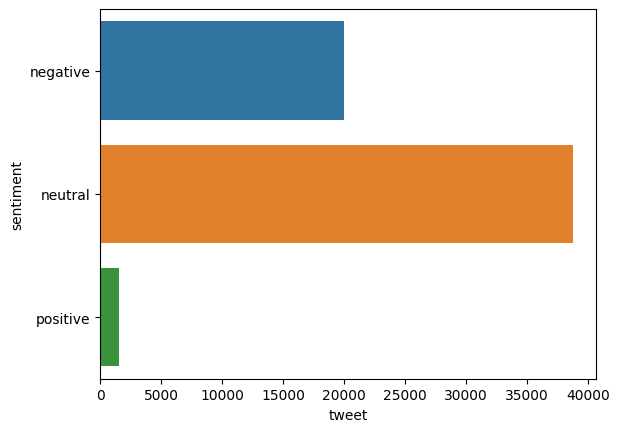

In [13]:
buffer = df.loc[ df.country == 'AR' ].groupby(['sentiment'], group_keys=False).count()[['tweet']].reset_index()
sns.barplot(data=buffer, x='tweet', y='sentiment')

<AxesSubplot: xlabel='tweet', ylabel='sentiment'>

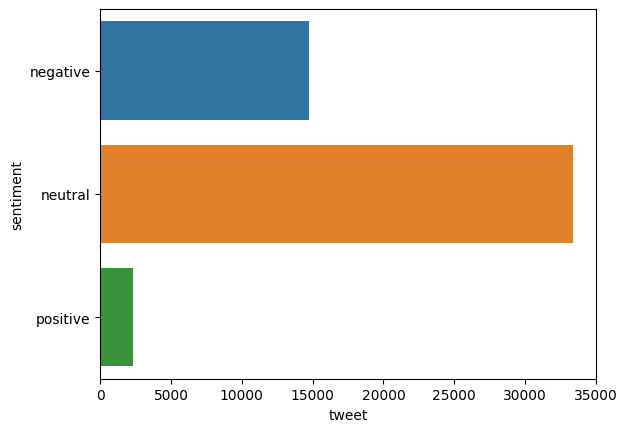

In [14]:
buffer = df.loc[ df.country == 'CL' ].groupby(['sentiment'], group_keys=False).count()[['tweet']].reset_index()
sns.barplot(data=buffer, x='tweet', y='sentiment')

<AxesSubplot: xlabel='tweet', ylabel='sentiment'>

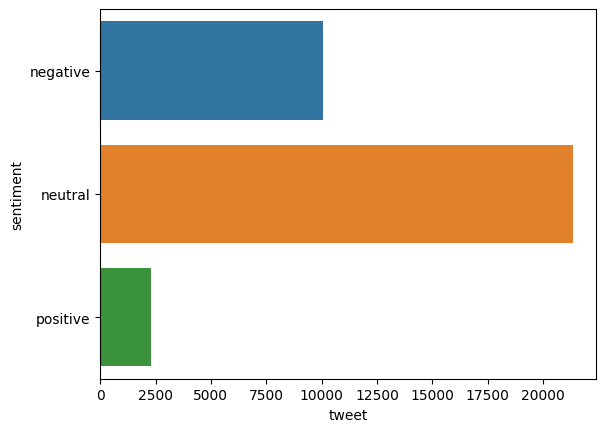

In [15]:
buffer = df.loc[ df.country == 'EC' ].groupby(['sentiment'], group_keys=False).count()[['tweet']].reset_index()
sns.barplot(data=buffer, x='tweet', y='sentiment')

<AxesSubplot: xlabel='tweet', ylabel='sentiment'>

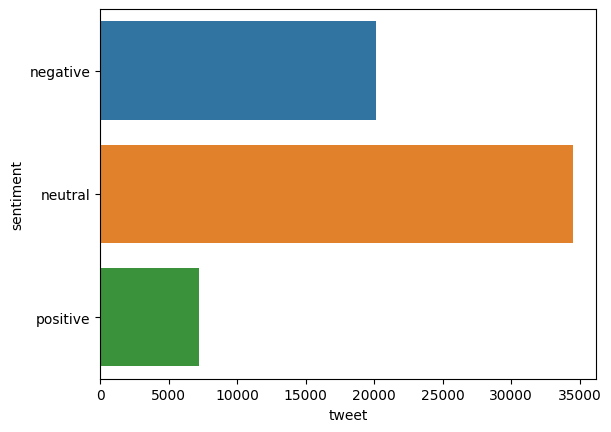

In [16]:
buffer = df.loc[ df.country == 'ES' ].groupby(['sentiment'], group_keys=False).count()[['tweet']].reset_index()
sns.barplot(data=buffer, x='tweet', y='sentiment')

<AxesSubplot: xlabel='tweet', ylabel='sentiment'>

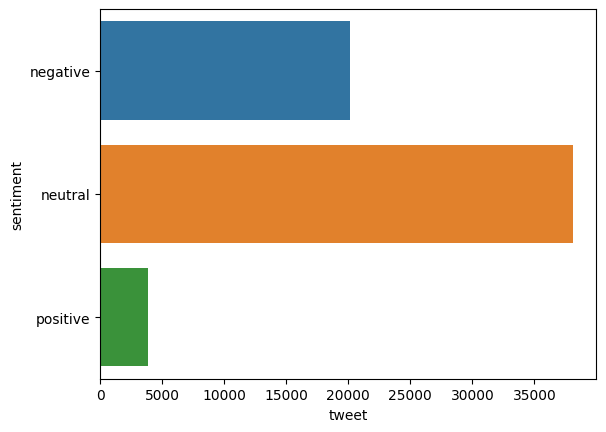

In [17]:
buffer = df.loc[ df.country == 'MX' ].groupby(['sentiment'], group_keys=False).count()[['tweet']].reset_index()
sns.barplot(data=buffer, x='tweet', y='sentiment')